# Correlation Analysis

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open('data.pkl', 'rb') as f:
    df = pickle.load(f)
df

,cocnumber,pit_tot_shelt_pit_hud,pit_tot_unshelt_pit_hud,pit_tot_hless_pit_hud,pit_ind_shelt_pit_hud,pit_ind_unshelt_pit_hud,pit_ind_hless_pit_hud,pit_perfam_shelt_pit_hud,pit_perfam_unshelt_pit_hud,pit_perfam_hless_pit_hud,...,Morbidity_Z-Score,Morbidity_Rank,Health_Behaviors_Z-Score,Health_Behaviors_Rank,Clinical_Care_Z-Score,Clinical_Care_Rank,Social_&_Economic_Factors_Z-Score,Social_&_Economic_Factors_Rank,Physical_Environment_Z-Score,Physical_Environment_Rank
year,,,,,,,,,,,,,,,,,,,,,
2010,IL-500,-0.281399,-1.263818,-0.676342,-0.271542,-1.229318,-0.542044,-0.652517,-0.813188,-0.743463,...,-1.006607,-1.312246,-0.059769,-0.360627,-0.019283,-0.381240,-1.572618,-1.352668,-0.024636,0.307714
2011,IL-500,-0.306863,-1.174078,-0.867944,-0.428203,-1.120046,-0.658669,-1.075352,-0.813188,-1.061838,...,-1.242296,-1.437779,-0.348571,-0.810540,0.526482,0.556672,-1.279880,-1.281018,-1.706064,-1.917276
2012,IL-500,-0.295723,-1.174078,-0.778530,-0.307694,-1.120046,-0.552646,-0.986334,-0.813188,-0.994812,...,-1.058785,-1.270402,-1.433596,-1.225845,-0.043076,-0.299682,-1.418073,-1.281018,-0.228953,-0.069403
2013,IL-500,-0.306067,-1.084338,-0.848784,-0.476407,-1.010773,-0.679874,-0.964080,-0.813188,-0.978055,...,-0.326895,-0.349824,-1.291732,-1.191237,-0.526421,-0.789027,-1.224140,-1.281018,-0.956812,-1.389313
2014,IL-500,-0.321186,-1.084338,-0.970132,-0.512559,-1.010773,-0.711681,-1.320151,-0.813188,-1.246160,...,-0.491127,-0.642735,-0.955892,-1.156628,-0.280637,-0.544355,-1.483603,-1.316843,1.472729,1.325929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,IL-520,-0.240021,2.056574,0.128386,-0.295643,0.846864,-0.160360,0.549224,0.972636,0.764629,...,0.582703,0.507212,0.783940,0.748135,1.162958,1.219704,0.934714,0.795510,0.633624,0.418055
2014,IL-520,-0.227289,0.755339,0.045358,-0.042575,0.519046,-0.001325,0.437952,0.845077,0.295445,...,0.634213,0.645144,0.901493,0.818634,1.250039,1.242359,0.908662,0.733148,0.281707,0.221116
2015,IL-520,-0.197846,0.037416,0.179480,0.246647,0.136591,0.178914,0.727260,-0.302952,0.362471,...,0.720404,0.728833,0.960796,0.932715,1.328600,1.352612,0.948366,0.832662,0.347248,0.225307


In [3]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

numeric_columns = numeric_columns[1::]

# Extract numeric data
numeric_data = df[numeric_columns]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform only the numeric data
scaled_data_numeric = scaler.fit_transform(numeric_data)

# Replace the scaled numeric values back into the original DataFrame
df[numeric_columns] = scaled_data_numeric
df

,cocnumber,pit_tot_shelt_pit_hud,pit_tot_unshelt_pit_hud,pit_tot_hless_pit_hud,pit_ind_shelt_pit_hud,pit_ind_unshelt_pit_hud,pit_ind_hless_pit_hud,pit_perfam_shelt_pit_hud,pit_perfam_unshelt_pit_hud,pit_perfam_hless_pit_hud,...,Morbidity_Z-Score,Morbidity_Rank,Health_Behaviors_Z-Score,Health_Behaviors_Rank,Clinical_Care_Z-Score,Clinical_Care_Rank,Social_&_Economic_Factors_Z-Score,Social_&_Economic_Factors_Rank,Physical_Environment_Z-Score,Physical_Environment_Rank
year,,,,,,,,,,,,,,,,,,,,,
2010,IL-500,-0.281399,-1.263818,-0.676342,-0.271542,-1.229318,-0.542044,-0.652517,-0.813188,-0.743463,...,-1.006607,-1.312246,-0.059769,-0.360627,-0.019283,-0.381240,-1.572618,-1.352668,-0.024636,0.307714
2011,IL-500,-0.306863,-1.174078,-0.867944,-0.428203,-1.120046,-0.658669,-1.075352,-0.813188,-1.061838,...,-1.242296,-1.437779,-0.348571,-0.810540,0.526482,0.556672,-1.279880,-1.281018,-1.706064,-1.917276
2012,IL-500,-0.295723,-1.174078,-0.778530,-0.307694,-1.120046,-0.552646,-0.986334,-0.813188,-0.994812,...,-1.058785,-1.270402,-1.433596,-1.225845,-0.043076,-0.299682,-1.418073,-1.281018,-0.228953,-0.069403
2013,IL-500,-0.306067,-1.084338,-0.848784,-0.476407,-1.010773,-0.679874,-0.964080,-0.813188,-0.978055,...,-0.326895,-0.349824,-1.291732,-1.191237,-0.526421,-0.789027,-1.224140,-1.281018,-0.956812,-1.389313
2014,IL-500,-0.321186,-1.084338,-0.970132,-0.512559,-1.010773,-0.711681,-1.320151,-0.813188,-1.246160,...,-0.491127,-0.642735,-0.955892,-1.156628,-0.280637,-0.544355,-1.483603,-1.316843,1.472729,1.325929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,IL-520,-0.240021,2.056574,0.128386,-0.295643,0.846864,-0.160360,0.549224,0.972636,0.764629,...,0.582703,0.507212,0.783940,0.748135,1.162958,1.219704,0.934714,0.795510,0.633624,0.418055
2014,IL-520,-0.227289,0.755339,0.045358,-0.042575,0.519046,-0.001325,0.437952,0.845077,0.295445,...,0.634213,0.645144,0.901493,0.818634,1.250039,1.242359,0.908662,0.733148,0.281707,0.221116
2015,IL-520,-0.197846,0.037416,0.179480,0.246647,0.136591,0.178914,0.727260,-0.302952,0.362471,...,0.720404,0.728833,0.960796,0.932715,1.328600,1.352612,0.948366,0.832662,0.347248,0.225307


In [4]:
# Perform PCA
pca = PCA(n_components=4)
pca.fit(scaled_data_numeric)

PCA(n_components=4)

Explained Variance Ratio: [0.29332282 0.11033165 0.1005631  0.06069458]
Cumulative Explained Variance: [0.29332282 0.40365447 0.50421757 0.56491215]
Number of components to retain: 4


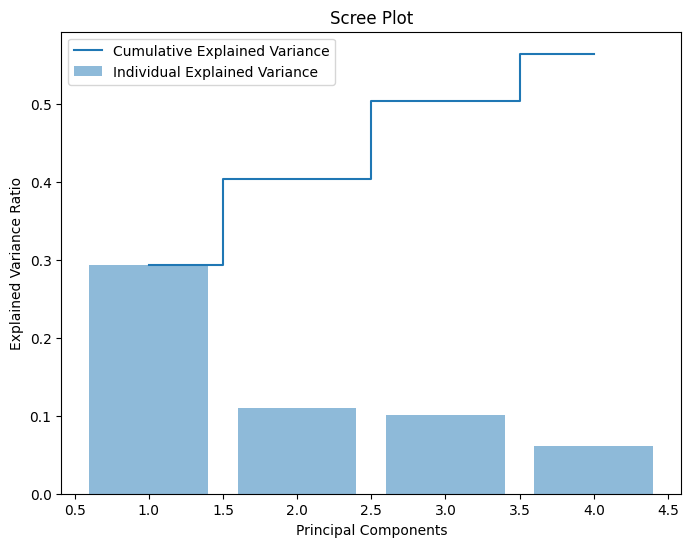

In [5]:
# display PCA

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()
print("Cumulative Explained Variance:", cumulative_variance)

# Determine the number of components to retain
n_components = len(cumulative_variance[cumulative_variance <= 0.95])
print("Number of components to retain:", n_components)

# Apply dimensionality reduction
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data_numeric)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=pca_data, columns=[f"PC{i+1}" for i in range(n_components)])

# Concatenate original DataFrame with PCA DataFrame if needed
# pca_df = pd.concat([df, pca_df], axis=1)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_components + 1), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1, n_components + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.show()

In [6]:
# get component list

# Get the principal component vectors
components = pca.components_


# Create a DataFrame to display the component loadings
component_loadings = pd.DataFrame(components, columns=df[numeric_columns].columns)

# Display the component loadings
print("Component Loadings:")
print(component_loadings)

Component Loadings:
   pit_tot_unshelt_pit_hud  pit_tot_hless_pit_hud  pit_ind_shelt_pit_hud  \
0                -0.006443               0.043220               0.053597   
1                -0.049440              -0.086963              -0.066780   
2                 0.096902               0.077566               0.064280   
3                -0.033434               0.028384               0.051133   

   pit_ind_unshelt_pit_hud  pit_ind_hless_pit_hud  pit_perfam_shelt_pit_hud  \
0                 0.000019               0.045192                  0.029185   
1                -0.041705              -0.066380                 -0.101083   
2                 0.101915               0.087467                  0.061539   
3                -0.041940               0.022655                 -0.018702   

   pit_perfam_unshelt_pit_hud  pit_perfam_hless_pit_hud  \
0                   -0.026651                  0.019800   
1                   -0.034143                 -0.092539   
2                    0.074

In [7]:
# another way to print
# Print loadings for each component
count = 0
for i, component in enumerate(df[numeric_columns].iterrows(), 1):
    count +=1
    print(f"Principal Component {i} Loadings:")
    print(component[1])
    print()  # for better readability
    if(count > 5):
      break

Principal Component 1 Loadings:
pit_tot_unshelt_pit_hud             -1.263818
pit_tot_hless_pit_hud               -0.676342
pit_ind_shelt_pit_hud               -0.271542
pit_ind_unshelt_pit_hud             -1.229318
pit_ind_hless_pit_hud               -0.542044
                                       ...   
Clinical_Care_Rank                  -0.381240
Social_&_Economic_Factors_Z-Score   -1.572618
Social_&_Economic_Factors_Rank      -1.352668
Physical_Environment_Z-Score        -0.024636
Physical_Environment_Rank            0.307714
Name: 2010, Length: 340, dtype: float64

Principal Component 2 Loadings:
pit_tot_unshelt_pit_hud             -1.174078
pit_tot_hless_pit_hud               -0.867944
pit_ind_shelt_pit_hud               -0.428203
pit_ind_unshelt_pit_hud             -1.120046
pit_ind_hless_pit_hud               -0.658669
                                       ...   
Clinical_Care_Rank                   0.556672
Social_&_Economic_Factors_Z-Score   -1.279880
Social_&_Economic_Fac

# Correlation Matrix

In [8]:
# Compute pairwise correlation of columns
correlation_matrix = df[numeric_columns].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                   pit_tot_unshelt_pit_hud  \
pit_tot_unshelt_pit_hud                           1.000000   
pit_tot_hless_pit_hud                             0.503986   
pit_ind_shelt_pit_hud                             0.252590   
pit_ind_unshelt_pit_hud                           0.875802   
pit_ind_hless_pit_hud                             0.462683   
...                                                    ...   
Clinical_Care_Rank                                0.119181   
Social_&_Economic_Factors_Z-Score                 0.195144   
Social_&_Economic_Factors_Rank                    0.274356   
Physical_Environment_Z-Score                      0.127978   
Physical_Environment_Rank                         0.157075   

                                   pit_tot_hless_pit_hud  \
pit_tot_unshelt_pit_hud                         0.503986   
pit_tot_hless_pit_hud                           1.000000   
pit_ind_shelt_pit_hud                           0.81754

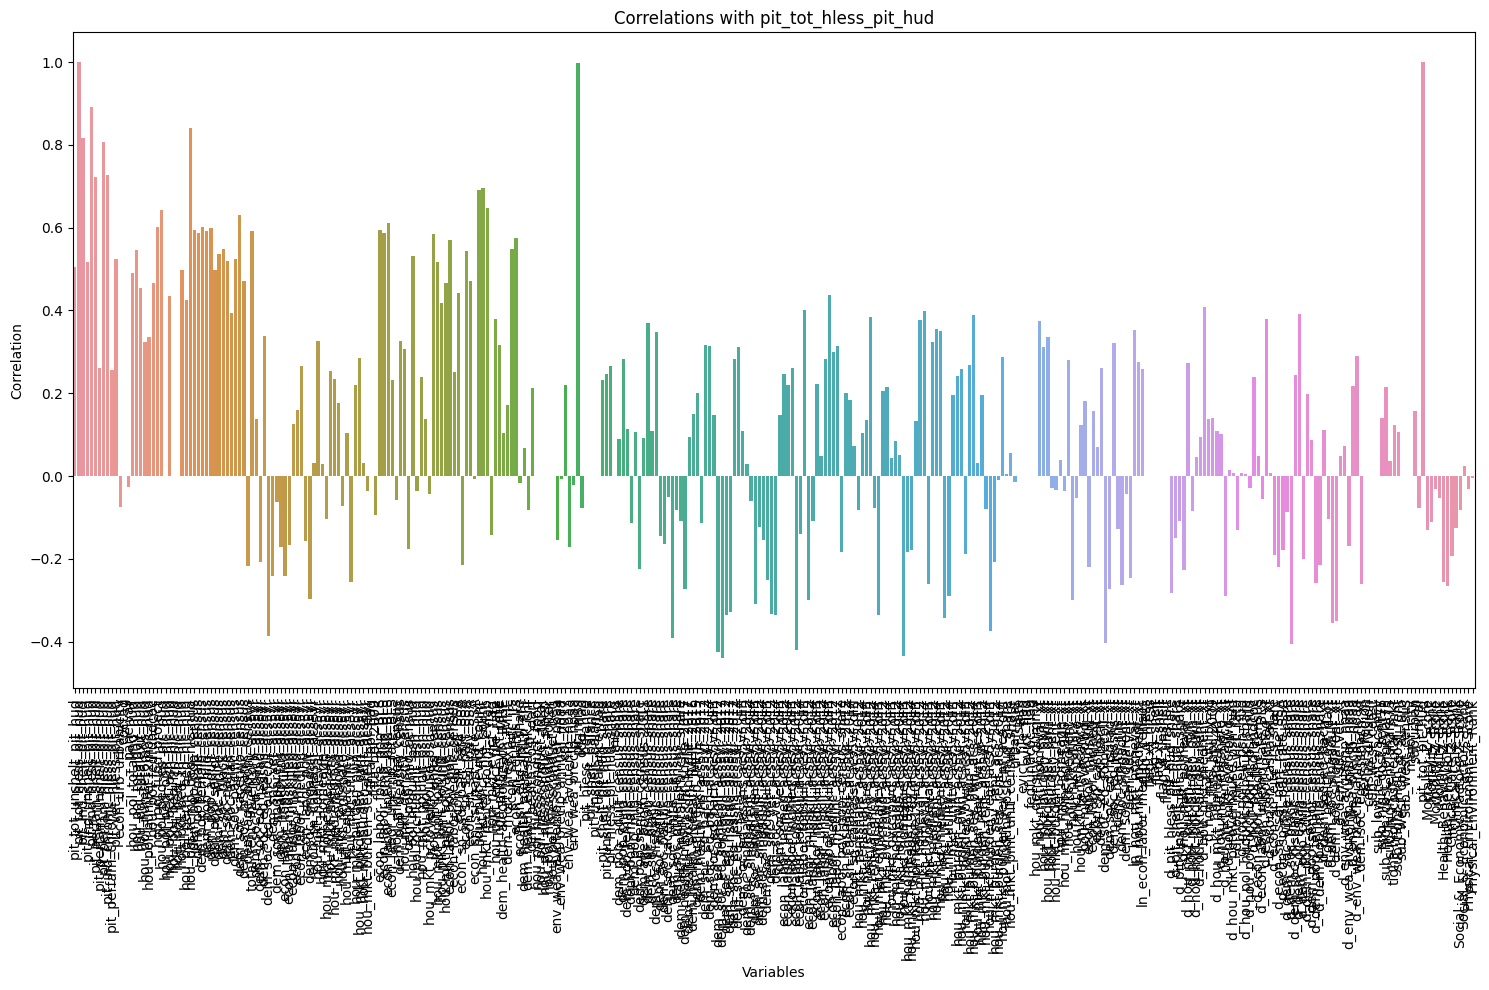

In [9]:
# use a single column (unsheltered)
specific_column = 'pit_tot_hless_pit_hud' #'pit_tot_unshelt_pit_hud'  # Replace 'column_name' with the name of your specific column
correlations_with_specific_column = correlation_matrix[specific_column]

plt.figure(figsize=(15, 10))
sns.barplot(x=correlations_with_specific_column.index, y=correlations_with_specific_column.values)
plt.title(f'Correlations with {specific_column}')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()





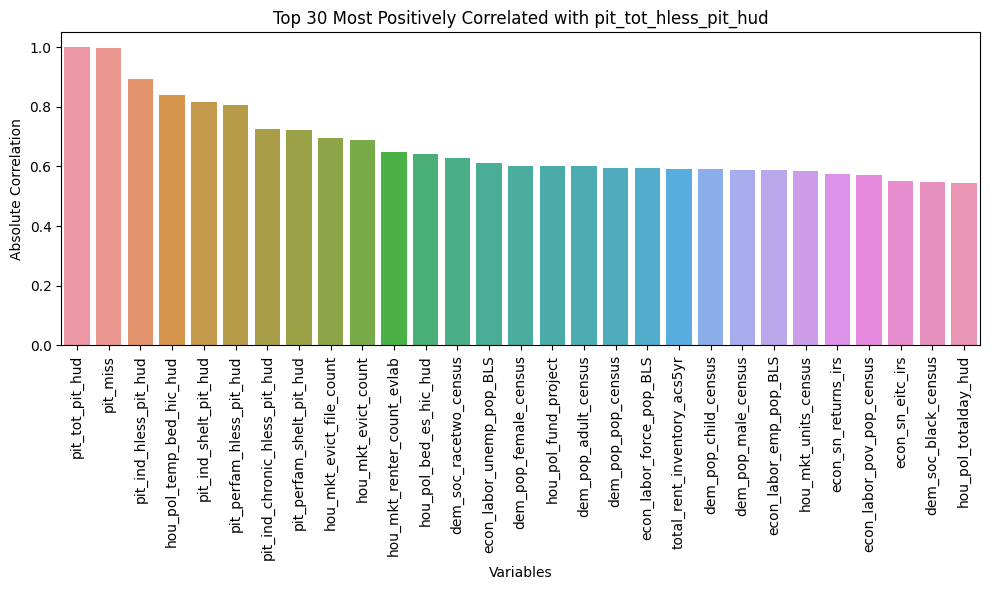

In [10]:
top_pos_correlations = correlations_with_specific_column.sort_values(ascending=False).head(30)

# Remove the correlation of the specific column with itself
top_pos_correlations = top_pos_correlations[top_pos_correlations.index != specific_column]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_pos_correlations.index, y=top_pos_correlations.values)
plt.title(f'Top 30 Most Positively Correlated with {specific_column}')
plt.xlabel('Variables')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [11]:
# remove columns that may be significantly ocrrelated, but not helpfu

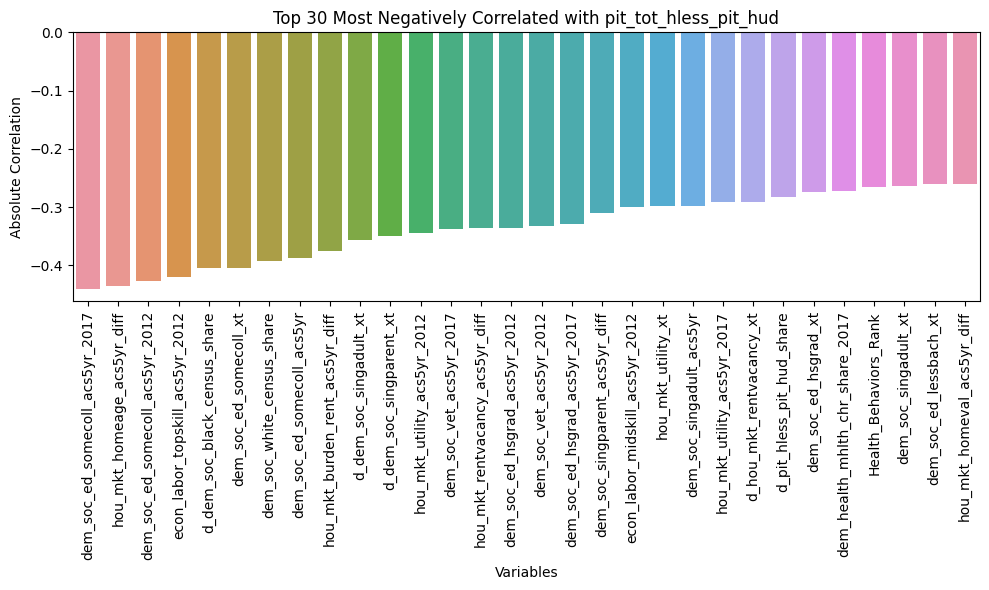

In [12]:
top_neg_correlations = correlations_with_specific_column.sort_values(ascending=True).head(30)

# Remove the correlation of the specific column with itself
top_neg_correlations = top_neg_correlations[top_neg_correlations.index != specific_column]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_neg_correlations.index, y=top_neg_correlations.values)
plt.title(f'Top 30 Most Negatively Correlated with {specific_column}')
plt.xlabel('Variables')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
from tsfresh.utilities.dataframe_functions import impute
from sklearn.feature_selection import SelectKBest, f_classif

numeric_data = df.select_dtypes(include=['number'])


# Separate features and target
X = numeric_data.drop('pit_tot_hless_pit_hud', axis=1)
y = (numeric_data['pit_tot_hless_pit_hud'] == specific_column).astype(int)

selector = SelectKBest(score_func=f_classif, k=30)  # Select top 10 features
X_selected = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)

selected_features = X.columns[selected_indices]

print("Selected Features:", selected_features)


Selected Features: Index(['d_env_wea_precip_noaa', 'd_env_wea_precip_annual_noaa',
       'dem_soc_ed_lessbach_xt', 'census_region', 'census_division',
       'sub_west_coast', 'sub_low_rent_vacancy', 'sub_high_cost_rent75',
       'sub_high_cost_homeval75', 'sub_high_rent_share75',
       'tight_high_cost_rental_mkt', 'sub_tight_high_cost_rent',
       'sub_west_coast_all_urb', 'sub_west_census', 'major_city', 'suburban',
       'rural', 'pit_tot_pit_hud', 'Mortality_Z-Score', 'Mortality_Rank',
       'Morbidity_Z-Score', 'Morbidity_Rank', 'Health_Behaviors_Z-Score',
       'Health_Behaviors_Rank', 'Clinical_Care_Z-Score', 'Clinical_Care_Rank',
       'Social_&_Economic_Factors_Z-Score', 'Social_&_Economic_Factors_Rank',
       'Physical_Environment_Z-Score', 'Physical_Environment_Rank'],
      dtype='object')


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


In [15]:
# use a stats model library to see multivriabel regression:

import statsmodels.api as sm

# Extract independent variables (features) and dependent variable (target)
X = numeric_data[selected_features]  # DataFrame containing features
y = numeric_data['pit_tot_hless_pit_hud']  # Series containing target variable

# Add a constant column to the independent variables matrix for the intercept term
X = sm.add_constant(X)

# Fit the multivariable regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     pit_tot_hless_pit_hud   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 6.269e+30
Date:                   Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                           16:49:20   Log-Likelihood:                 5043.3
No. Observations:                    152   AIC:                        -1.004e+04
Df Residuals:                        128   BIC:                            -9966.
Df Model:                             23                                         
Covariance Type:               nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------